<div id="todo_description"><table style="background-color: rgb(13,32,76); border-radius: 10px">
	<thead>
		<tr>
			<th colspan="2" style="border: hidden; vertical-align: top;" width="15%"><img src="https://assets.codingdojo.com/boomyeah2015/codingdojo/curriculum/content/chapter/1674755226__Icons_400px_Practice Assignment.png">
			</th>
			<th style="border: hidden;">
				<h1 style="color: white;">Feature Selection (Practice)</h1>
			</th>
		</tr>
	</thead>
</table>

<p>This practice assignment will reinforce important learning objectives from the previous lesson(s), and allow you to take on more challenging core assignments, preparing you for graduation.<br></p>



<p>Practice and tinker with this assignment until you're comfortable performing each of the tasks. Then, be sure to submit your output as described in the steps below.</p>



<hr>



<h1><span style="background-color: initial; font-family: Gotham-Rounded-Bold;">Feature Selection (Practice)</span><br></h1><p>​This assignment will give you a chance to practice Feature Selection techniques. We will use the dataset we introduced in the PCA for the visualization lesson:&nbsp;W&nbsp;<a href="https://drive.google.com/file/d/1hLcF8DVr9l1h3dd9dAJJmzYeCWXF3XrM/view?usp=drive_link" target="_blank">modified version of the Mice Protein Expression data</a>&nbsp;(from&nbsp;<a href="https://www.kaggle.com/datasets/ruslankl/mice-protein-expression" target="_blank">Kaggle</a>). Details on the modifications made can be found in&nbsp;<a href="https://docs.google.com/document/d/1CIVpm-clzpMTMKPUWepWEkNelCnOV_X2-V8W0DBocSg/edit?usp=sharing" target="_blank">this google doc</a>.</p><p>1) Use "Treatment" for the target and drop ​'Type of Mouse,' 'Training,' 'class,' and 'MouseID.'</p><p>2) Create a preprocessing pipeline to impute missing values with 0 and scale the data.</p><p>3) Train test split</p><p>4) Evaluate the performance of a default random forest using all 77 features.</p><p>5) ​ Use the SequentialFeature Selector with a simple DecisionTreeClassifier to select about half of the features (n_features_to_select = 39)</p><p>6) Evaluate the performance of the default random forest using 39 features selected in the previous step.</p><p>7)&nbsp;Use the SequentialFeature Selector with a simple DecisionTreeClassifier&nbsp; to select about a quarter of the features (n_features_to_select = 19)</p><p>8) Evaluate the performance of the default random forest using 19 features selected in the previous step.<br></p><p>​9) In a markdown cell, describe the pros and cons of using 77, 39, or 19 features for this model.</p><p><br></p>
        
</div>

In [1]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler,OrdinalEncoder
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
from sklearn import set_config
set_config(transform_output='pandas')
pd.set_option('display.max_columns',100)

In [2]:
df = pd.read_csv("Downloads/modified-Data_Cortex_Nuclear.csv")
# Dropping unique IDs
df = df.drop(columns=['MouseID'])
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1080 entries, 0 to 1079
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   DYRK1A_N         1077 non-null   float64
 1   ITSN1_N          1077 non-null   float64
 2   BDNF_N           1077 non-null   float64
 3   NR1_N            1077 non-null   float64
 4   NR2A_N           1077 non-null   float64
 5   pAKT_N           1077 non-null   float64
 6   pBRAF_N          1077 non-null   float64
 7   pCAMKII_N        1077 non-null   float64
 8   pCREB_N          1077 non-null   float64
 9   pELK_N           1077 non-null   float64
 10  pERK_N           1077 non-null   float64
 11  pJNK_N           1077 non-null   float64
 12  PKCA_N           1077 non-null   float64
 13  pMEK_N           1077 non-null   float64
 14  pNR1_N           1077 non-null   float64
 15  pNR2A_N          1077 non-null   float64
 16  pNR2B_N          1077 non-null   float64
 17  pPKCAB_N      

,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,pERK_N,pJNK_N,PKCA_N,pMEK_N,pNR1_N,pNR2A_N,pNR2B_N,pPKCAB_N,pRSK_N,AKT_N,BRAF_N,CAMKII_N,CREB_N,ELK_N,ERK_N,GSK3B_N,JNK_N,MEK_N,TRKA_N,RSK_N,APP_N,Bcatenin_N,SOD1_N,MTOR_N,P38_N,pMTOR_N,DSCR1_N,AMPKA_N,NR2B_N,pNUMB_N,RAPTOR_N,TIAM1_N,pP70S6_N,NUMB_N,P70S6_N,pGSK3B_N,pPKCG_N,CDK5_N,S6_N,ADARB1_N,AcetylH3K9_N,RRP1_N,BAX_N,ARC_N,ERBB4_N,nNOS_N,Tau_N,GFAP_N,GluR3_N,GluR4_N,IL1B_N,P3525_N,pCASP9_N,PSD95_N,SNCA_N,Ubiquitin_N,pGSK3B_Tyr216_N,SHH_N,BAD_N,BCL2_N,pS6_N,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N,Type of Mouse,Treatment,Training,class
0,0.503644,0.747193,0.430175,2.816329,5.990152,0.218830,0.177565,2.373744,0.232224,1.750936,0.687906,0.306382,0.402698,0.296927,1.022060,0.605673,1.877684,2.308745,0.441599,0.859366,0.416289,0.369608,0.178944,1.866358,3.685247,1.537227,0.264526,0.319677,0.813866,0.165846,0.453910,3.037621,0.369510,0.458539,0.335336,0.825192,0.576916,0.448099,0.586271,0.394721,0.339571,0.482864,0.294170,0.182150,0.842725,0.192608,1.443091,0.294700,0.354605,1.339070,0.170119,0.159102,0.188852,0.106305,0.144989,0.176668,0.125190,0.115291,0.228043,0.142756,0.430957,0.247538,1.603310,2.014875,0.108234,1.044979,0.831557,0.188852,0.122652,NaN,0.106305,0.108336,0.427099,0.114783,0.131790,0.128186,1.675652,Normal,Drug,Trained,Normal-Trained-Drug
1,0.514617,0.689064,0.411770,2.789514,5.685038,0.211636,0.172817,2.292150,0.226972,1.596377,0.695006,0.299051,0.385987,0.281319,0.956676,0.587559,1.725774,2.043037,0.445222,0.834659,0.400364,0.356178,0.173680,1.761047,3.485287,1.509249,0.255727,0.304419,0.780504,0.157194,0.430940,2.921882,0.342279,0.423560,0.324835,0.761718,0.545097,0.420876,0.545097,0.368255,0.321959,0.454519,0.276431,0.182086,0.847615,0.194815,1.439460,0.294060,0.354548,1.306323,0.171427,0.158129,0.184570,0.106592,0.150471,0.178309,0.134275,0.118235,0.238073,0.142037,0.457156,0.257632,1.671738,2.004605,0.109749,1.009883,0.849270,0.200404,0.116682,NaN,0.106592,0.104315,0.441581,0.111974,0.135103,0.131119,1.743610,Normal,Drug,Trained,Normal-Trained-Drug
2,0.509183,0.730247,0.418309,2.687201,5.622059,0.209011,0.175722,2.283337,0.230247,1.561316,0.677348,0.291276,0.381002,0.281710,1.003635,0.602449,1.731873,2.017984,0.467668,0.814329,0.399847,0.368089,0.173905,1.765544,3.571456,1.501244,0.259614,0.311747,0.785154,0.160895,0.423187,2.944136,0.343696,0.425005,0.324852,0.757031,0.543620,0.404630,0.552994,0.363880,0.313086,0.447197,0.256648,0.184388,0.856166,0.200737,1.524364,0.301881,0.386087,1.279600,0.185456,0.148696,0.190532,0.108303,0.145330,0.176213,0.132560,0.117760,0.244817,0.142445,0.510472,0.255343,1.663550,2.016831,0.108196,0.996848,0.846709,0.193685,0.118508,NaN,0.108303,0.106219,0.435777,0.111883,0.133362,0.127431,1.926427,Normal,Drug,Trained,Normal-Trained-Drug
3,0.442107,0.617076,0.358626,2.466947,4.979503,0.222886,0.176463,2.152301,0.207004,1.595086,0.583277,0.296729,0.377087,0.313832,0.875390,0.520293,1.566852,2.132754,0.477671,0.727705,0.385639,0.362970,0.179449,1.286277,2.970137,1.419710,0.259536,0.279218,0.734492,0.162210,0.410615,2.500204,0.344509,0.429211,0.330121,0.746980,0.546763,0.386860,0.547849,0.366771,0.328492,0.442650,0.398534,0.161768,0.760234,0.184169,1.612382,0.296382,0.290680,1.198765,0.159799,0.166112,0.185323,0.103184,0.140656,0.163804,0.123210,0.117439,0.234947,0.145068,0.430996,0.251103,1.484624,1.957233,0.119883,0.990225,0.833277,0.192112,0.132781,NaN,0.103184,0.111262,0.391691,0.130405,0.147444,0.146901,1.700563,Normal,Drug,Trained,Normal-Trained-Drug
4,0.434940,0.617430,0.358802,2.365785,4.718679,0.213106,0.173627,2.134014,0.192158,1.504230,0.550960,0.286961,0.363502,0.277964,0.864912,0.507990,1.480059,2.013697,0.483416,0.687794,0.367531,0.355311,0.174836,1.324695,2.896334,1.359876,0.250705,0.273667,0.702699,0.154827,0.398550,2.456560,0.329126,0.408755,0.313415,0.691956,0.536860,0.360816,0.512824,0.351551,0.312206,0.419095,0.393447,0.160200,0.768113,0.185718,1.645807,0.296829,0.309345,1.206995,

Run a model with all features for comparison

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Preprocessing tools
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# Setting options
n=800
pd.set_option('display.max_columns',n)
pd.set_option("display.max_info_rows", n)
pd.set_option('display.max_info_columns',n)
from sklearn import set_config
set_config(transform_output='pandas')

In [4]:
from sklearn.metrics import ConfusionMatrixDisplay, classification_report
def classification_metrics(y_true, y_pred, label="",
                           output_dict=False, figsize=(8,4),
                           normalize='true', cmap='Blues',
                           colorbar=False):
  # Get the classification report
  report = classification_report(y_true, y_pred)
  ## Print header and report
  header = "-"*70
  print(header, f" Classification Metrics: {label}", header, sep='\n')
  print(report)
  ## CONFUSION MATRICES SUBPLOTS
  fig, axes = plt.subplots(ncols=2, figsize=figsize)
  # create a confusion matrix  of raw counts
  ConfusionMatrixDisplay.from_predictions(y_true, y_pred,
                normalize=None, cmap='gist_gray', colorbar=colorbar,
                ax = axes[0],);
  axes[0].set_title("Raw Counts")
  # create a confusion matrix with the test data
  ConfusionMatrixDisplay.from_predictions(y_true, y_pred,
                normalize=normalize, cmap=cmap, colorbar=colorbar,
                ax = axes[1]);
  axes[1].set_title("Normalized Confusion Matrix")
  # Adjust layout and show figure
  fig.tight_layout()
  plt.show()
  # Return dictionary of classification_report
  if output_dict==True:
    report_dict = classification_report(y_true, y_pred, output_dict=True)
    return report_dict
    
    
    
def evaluate_classification(model, X_train, y_train, X_test, y_test,
                         figsize=(6,4), normalize='true', output_dict = False,
                            cmap_train='Blues', cmap_test="Reds",colorbar=False):
  # Get predictions for training data
  y_train_pred = model.predict(X_train)
  # Call the helper function to obtain regression metrics for training data
  results_train = classification_metrics(y_train, y_train_pred, #verbose = verbose,
                                     output_dict=True, figsize=figsize,
                                         colorbar=colorbar, cmap=cmap_train,
                                     label='Training Data')
  print()
  # Get predictions for test data
  y_test_pred = model.predict(X_test)
  # Call the helper function to obtain regression metrics for test data
  results_test = classification_metrics(y_test, y_test_pred, #verbose = verbose,
                                  output_dict=True,figsize=figsize,
                                         colorbar=colorbar, cmap=cmap_test,
                                    label='Test Data' )
  if output_dict == True:
    # Store results in a dataframe if ouput_frame is True
    results_dict = {'train':results_train,
                    'test': results_test}
    return results_dict

In [5]:
# Check for null values
df.isna().sum().sum()

1396

In [6]:
possible_targets = ['Type of Mouse',"Treatment",'Training','class',]
for col in possible_targets:
    print(f'\n- {col}:')
    print(df[col].value_counts())


- Type of Mouse:
Normal      570
Modified    510
Name: Type of Mouse, dtype: int64

- Treatment:
Drug       570
Placebo    510
Name: Treatment, dtype: int64

- Training:
Untrained    555
Trained      525
Name: Training, dtype: int64

- class:
Normal-Trained-Drug           150
Normal-Untrained-Drug         150
Normal-Trained-Placebo        135
Normal-Untrained-Placebo      135
Modified-Trained-Drug         135
Modified-Untrained-Drug       135
Modified-Untrained-Placebo    135
Modified-Trained-Placebo      105
Name: class, dtype: int64


In [7]:
# Define X and y
target = "Treatment"
X = df.drop(columns = possible_targets)
y = df[target]

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [9]:
# Preprocessing pipeline
# instantiate preprocessors
impute_0 = SimpleImputer(strategy='constant', fill_value = 0)
scaler = StandardScaler()

In [10]:
preprocessor = make_pipeline(impute_0, scaler)
preprocessor

Pipeline(steps=[('simpleimputer',
                 SimpleImputer(fill_value=0, strategy='constant')),
                ('standardscaler', StandardScaler())])

In [11]:
preprocessor.fit(X_train)
X_train_tf = preprocessor.transform(X_train)
X_test_tf = preprocessor.transform(X_test)

In [12]:
X_train_tf

,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,pERK_N,pJNK_N,PKCA_N,pMEK_N,pNR1_N,pNR2A_N,pNR2B_N,pPKCAB_N,pRSK_N,AKT_N,BRAF_N,CAMKII_N,CREB_N,ELK_N,ERK_N,GSK3B_N,JNK_N,MEK_N,TRKA_N,RSK_N,APP_N,Bcatenin_N,SOD1_N,MTOR_N,P38_N,pMTOR_N,DSCR1_N,AMPKA_N,NR2B_N,pNUMB_N,RAPTOR_N,TIAM1_N,pP70S6_N,NUMB_N,P70S6_N,pGSK3B_N,pPKCG_N,CDK5_N,S6_N,ADARB1_N,AcetylH3K9_N,RRP1_N,BAX_N,ARC_N,ERBB4_N,nNOS_N,Tau_N,GFAP_N,GluR3_N,GluR4_N,IL1B_N,P3525_N,pCASP9_N,PSD95_N,SNCA_N,Ubiquitin_N,pGSK3B_Tyr216_N,SHH_N,BAD_N,BCL2_N,pS6_N,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N
519,-0.689852,-0.693414,-0.380907,0.713965,-0.211690,0.631628,0.854270,-0.735185,0.524558,-0.034643,-0.739329,0.460454,-0.467925,1.089598,0.462813,-0.020536,0.182995,-0.673531,0.088345,0.829163,-0.366903,0.779287,0.278101,-0.182507,0.105081,-0.354933,0.641128,0.676853,0.606465,1.622999,-1.033274,0.434392,1.209197,0.337185,0.089947,0.004641,0.135297,-0.330738,-0.096726,-1.217633,-0.247015,-0.597245,-0.193326,-0.820461,-0.421887,-0.347986,-0.870800,-0.852784,-1.089741,-0.927949,-0.834912,-0.455804,-0.086359,0.147984,-0.547513,0.223975,-1.209492,-0.783113,-0.766009,-1.404010,-0.139814,-0.760809,-0.158690,0.860746,0.078157,0.728807,-0.582361,-0.894169,0.323505,0.577635,0.147984,-0.352789,0.425612,-0.386619,0.299704,0.565780,-0.002901
296,-0.702791,-0.681196,-0.559545,-0.566876,-0.749503,0.398448,0.468963,0.215686,-0.391121,-0.291867,-0.664945,0.333628,-0.275583,0.434047,-0.302496,-0.020264,-0.486245,-0.453081,0.118153,0.136334,-0.479769,0.290147,0.538759,-0.479654,-0.273120,-0.171739,0.308783,0.246179,-0.385739,0.689742,-1.200057,-0.746189,0.156194,-0.425335,-0.023741,-0.322556,0.023100,-0.792967,-0.328755,-0.839394,-1.078215,-0.934133,-0.463090,0.036937,-0.049800,-0.734889,-0.141908,-0.008221,-0.846173,-0.989472,-0.528631,-0.056576,0.512661,0.111496,0.810421,-0.213854,-0.092782,-0.277281,-0.418414,-0.976609,0.614242,-0.559633,-0.094248,0.575196,0.171723,0.727872,1.419293,1.025570,0.825637,-1.560262,0.111496,1.436024,0.709278,-1.722601,1.281144,-1.543589,-0.234190
110,-0.119588,-0.139101,0.175560,0.555443,0.775236,-0.093749,-0.313676,-1.016051,-0.021544,0.019095,0.294244,0.334067,-0.459018,-0.613151,0.834476,-0.306915,0.688413,-0.547851,-0.910264,0.175213,-0.160132,0.059012,-0.790718,0.129359,1.630397,0.362977,0.235051,0.049940,0.642649,-0.499045,-0.311596,0.557149,-0.817817,0.116653,-0.852372,0.109032,-0.225155,-0.522174,0.041852,0.695438,-0.570787,-0.259916,-1.492694,0.159751,0.972924,-0.165477,-1.313988,0.158214,0.707000,0.157990,-0.518657,-0.439760,-0.921108,-0.204448,-0.118663,0.942041,-0.465158,0.106657,1.923700,0.882999,0.773982,-0.281553,0.808966,0.483149,-0.708791,-0.547348,0.074538,-0.300935,0.397724,-1.560262,-0.204448,-0.212969,0.820244,-1.722601,-1.888021,0.293585,0.789634
911,0.225687,0.112011,-1.137259,-0.925793,-0.605778,-0.696032,-1.353684,-1.481943,-1.368071,0.329716,0.250867,-1.485427,-1.304148,-1.723206,-0.582546,-1.089599,-0.692340,-0.661865,-1.490583,-0.764155,0.011366,-0.885215,-1.803053,-0.583578,-0.352650,-0.416004,-1.312658,-1.791404,-0.995456,-1.692414,-0.209459,-0.850589,-0.925154,-0.321049,-0.679625,-0.744958,0.027177,-0.669898,-0.900096,0.507321,-0.225785,-0.019026,-1.436140,0.213471,-0.767397,-0.524833,-1.729155,-0.496163,0.058624,-0.336957,-0.814728,0.018327,-3.259123,-2.122948,-1.762062,-2.666001,-1.050025,1.319041,-2.150212,-1.498818,-1.402812,-1.598252,-1.116923,-2.703883,-0.641895,-1.518415,-2.048254,-1.416894,-0.187330,0.200469,-2.122948,0.588915,-2.423469,-0.496096,0.047217,-0.170994,-1.234379
910,0.155483,0.041634,-1.334173,-1.128161,-0.724228,-1.351780,-1.533118,-1.506720,-1.412756,-0.042497,0.213658,-1.442084,-1.516718,-1.759455,-0.760320,-1.187156,-0.830696,-0.879292,-1.667773,-0.820370,-0.045980,-1.172321,-1.935653,-0.691505,-0.474865,-0.417518,-1.537753,-1.918119,-1.322319,-1.879524,-0.149594,-1.005327,-0.943356,-0.375516,-0.792130,-0.857988,-0.274425,-0.785992,-0.941652,0.203153,-0.962872,-0.295107,-1.483133,

----------------------------------------------------------------------
 Classification Metrics: Training Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

        Drug       1.00      1.00      1.00       440
     Placebo       1.00      1.00      1.00       370

    accuracy                           1.00       810
   macro avg       1.00      1.00      1.00       810
weighted avg       1.00      1.00      1.00       810



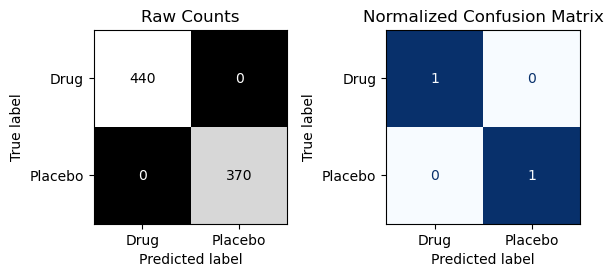


----------------------------------------------------------------------
 Classification Metrics: Test Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

        Drug       1.00      1.00      1.00       130
     Placebo       1.00      1.00      1.00       140

    accuracy                           1.00       270
   macro avg       1.00      1.00      1.00       270
weighted avg       1.00      1.00      1.00       270



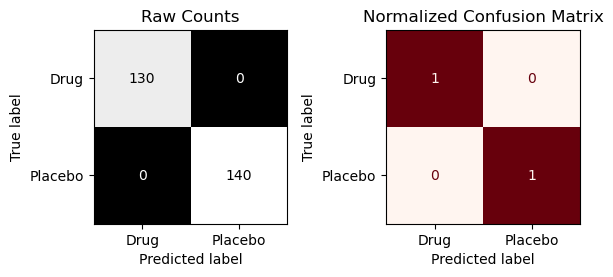

In [13]:
# Use all features for a default random forest
rf_clf = RandomForestClassifier(random_state = 42)
rf_clf.fit(X_train_tf, y_train)
evaluate_classification(rf_clf, X_train_tf, y_train, X_test_tf, y_test)

In [14]:
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.tree import DecisionTreeClassifier

In [15]:
# Instantiate the model
dt = DecisionTreeClassifier(random_state = 42)


In [16]:
# Instantiate the SequentialFeatureSelector
sfs = SequentialFeatureSelector(dt, n_features_to_select=39,
                                direction = 'forward', cv=2,
                                 n_jobs=-1)
sfs.fit(X_train_tf,y_train)

SequentialFeatureSelector(cv=2,
                          estimator=DecisionTreeClassifier(random_state=42),
                          n_features_to_select=39, n_jobs=-1)

In [17]:
# Preview array
sfs.support_[0:5]

array([False, False,  True, False,  True])

In [18]:
# .support_ returns an array of T/F whether it is above threshold
features_to_keep = sfs.support_
# Only include the features selected
X_train_39 = X_train_tf.loc[:,features_to_keep]
X_test_39 = X_test_tf.loc[:,features_to_keep]
X_train_39.shape

(810, 39)

----------------------------------------------------------------------
 Classification Metrics: Training Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

        Drug       1.00      1.00      1.00       440
     Placebo       1.00      1.00      1.00       370

    accuracy                           1.00       810
   macro avg       1.00      1.00      1.00       810
weighted avg       1.00      1.00      1.00       810



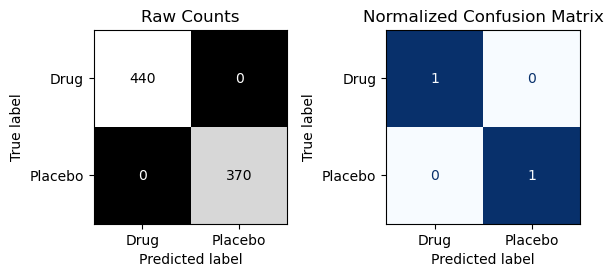


----------------------------------------------------------------------
 Classification Metrics: Test Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

        Drug       0.97      0.98      0.98       130
     Placebo       0.99      0.97      0.98       140

    accuracy                           0.98       270
   macro avg       0.98      0.98      0.98       270
weighted avg       0.98      0.98      0.98       270



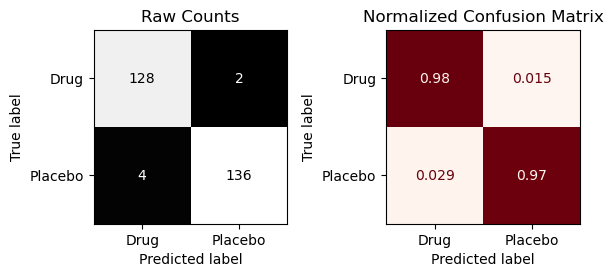

In [19]:
# Instantiate default random forest
rf_clf = RandomForestClassifier(random_state=42)
# Fit on 39 selected featuers
rf_clf.fit(X_train_39, y_train)
# Evaluate with custom function
evaluate_classification(rf_clf, X_train_39, y_train, X_test_39, y_test)

In [20]:
# Instantiate the SequentialFeatureSelector
sfs = SequentialFeatureSelector(dt, n_features_to_select=19,
                                direction = 'forward', cv=2,
                                 n_jobs=-1)
sfs.fit(X_train_39, y_train)

SequentialFeatureSelector(cv=2,
                          estimator=DecisionTreeClassifier(random_state=42),
                          n_features_to_select=20, n_jobs=-1)

In [23]:
# .support_ returns an array of T/F whether it is above threshold
features_to_keep = sfs.support_
# Only include the features selected
X_train_19 = X_train_39.loc[:,features_to_keep]
X_test_19 = X_test_39.loc[:,features_to_keep]
X_train_19.shape

(810, 20)

----------------------------------------------------------------------
 Classification Metrics: Training Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

        Drug       1.00      1.00      1.00       440
     Placebo       1.00      1.00      1.00       370

    accuracy                           1.00       810
   macro avg       1.00      1.00      1.00       810
weighted avg       1.00      1.00      1.00       810



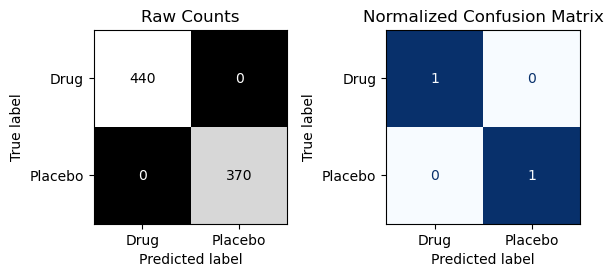


----------------------------------------------------------------------
 Classification Metrics: Test Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

        Drug       0.98      0.97      0.97       130
     Placebo       0.97      0.98      0.98       140

    accuracy                           0.97       270
   macro avg       0.97      0.97      0.97       270
weighted avg       0.97      0.97      0.97       270



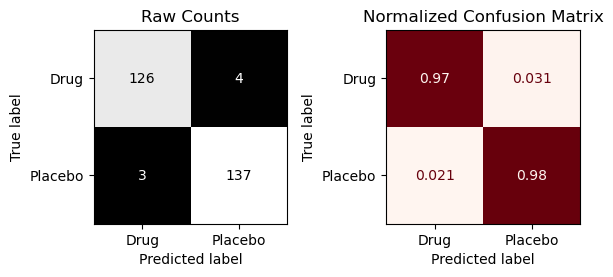

In [24]:
# Instantiate default random forest
rf_clf = RandomForestClassifier(random_state=42)
# Fit on 39 selected featuers
rf_clf.fit(X_train_19, y_train)
# Evaluate with custom function
evaluate_classification(rf_clf, X_train_19, y_train, X_test_19, y_test)

As we decreased the number of features, we saw the accuracy decline slightly, but the advantage is that less features will make the model easi